In [1]:
# from pyaudi import gdual_double as gd 
# from pyaudi import gdual_vdouble as gdv
# import Utils.DA as da 
# from Utils.gpops import gpops
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from math import pi 
import os 
print os.getcwd()


E:\Documents\EDL


In [4]:
def rad(num):
    return num*pi/180.
print rad(20)
dr = 900.
fpa_min = rad(-14.)
azi_max = rad(1.5)
# traj = gpops([dr,fpa_min,azi_max])

0.349065850399


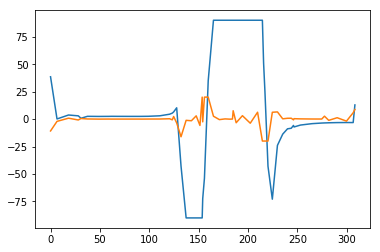

In [9]:
plt.plot(traj['time'],np.degrees(traj['sigma']))
plt.plot(traj['time'],np.degrees(traj['sigma_dot']))

plt.show()

In [35]:
def squash(d):
    out = {}
    for key,val in d.items():
        out[key] = np.array(val).squeeze()
    out.pop('state')
    out.pop('target')
    return out
        
states = pd.DataFrame(data=np.array(traj['state']),columns=['r','lon','lat','vel','fpa','azi','sigma']) 
states['time'] = np.squeeze(traj['time'])
states.set_index('time')
np.array(traj['state'])
# states.reindex()
# df = pd.DataFrame(squash(traj)) # The rest of the solution data 

(58L, 7L)

In [1]:
from scipy.io import loadmat 

In [9]:
Var = []
Fpa = []
Heading = []
for i in range(1,31):
    data = loadmat('./data/MC_1000_2018-03-29_{}'.format(i))
    r,th,ph,v,fpa,psi,s,m = data['xf'].T
    dr = th*3397
    cr = ph*3397
    err = np.sqrt((dr-885)**2+cr**2)
    var = np.std(err)
    Var.append(var)
    Fpa.append(np.mean(fpa))
    Heading.append(np.mean(psi))

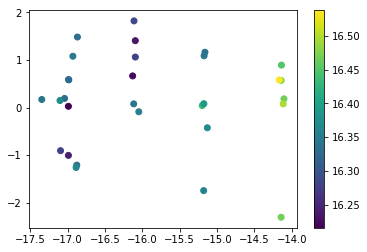

In [10]:
plt.scatter(np.degrees(Fpa), np.degrees(Heading), c=Var)
plt.colorbar()
plt.show()

In [13]:
min(Var)

16.2155435147967

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn
seaborn.set_style("whitegrid")

In [21]:
traj,bank_profile = MC.solve_ocp(dr=820)

Connected to existing (shared) Matlab instance.
Total OCP solution time 15.4789998531 s


469.99999999999994

In [38]:
from EntryGuidance import Mesh 
from EntryGuidance import EntryEquations as EE
from EntryGuidance import Convex_Entry as CVX
from EntryGuidance import MonteCarloV as MC
from EntryGuidance import Parachute 

reload(Mesh)
reload(EE)
reload(CVX)
reload(MC)

<module 'EntryGuidance.MonteCarloV' from 'EntryGuidance\MonteCarloV.py'>

In [39]:
mc = MC.MonteCarlo()
X,U_cvx,x_ref,u_ref,x_int = mc.reference_data(bank_profile, np.array(traj['state'])[-1,3])

r,th,ph,v,fpa,psi,bank = x_ref
h = r/1000-3397
Ef = mc.ref_sim.edlModel.energy(r,v,0)[-1]
print("Original final altitude: {:.2f} km".format(h[-1]))
print("Original final velocity: {:.2f}".format(v[-1]))

r,th,ph,v,fpa,psi,bank = X
h = r/1000-3397
Ef = mc.ref_sim.edlModel.energy(r,v,0)[-1]
print("Replanned final altitude: {:.2f} km".format(h[-1]))
print("Replanned final velocity: {:.2f}".format(v[-1]))
U = {}
U['CVX'] = U_cvx
U['Reference'] = u_ref

Generating reference data...
...done. 
(1444L, 8L)
Generating linearization about reference data...
...done.
Solving convex optimization problem...
status:         optimal_inaccurate
optimal value:  44.478
solution time:  5.501 s
setup time:     9.716 s
penalty value:  4.54617024906e-07

...done.

Propagating new solution to check its validity...
Original final altitude: 12.05 km
Original final velocity: 469.99
Replanned final altitude: 11.70 km
Replanned final velocity: 457.33


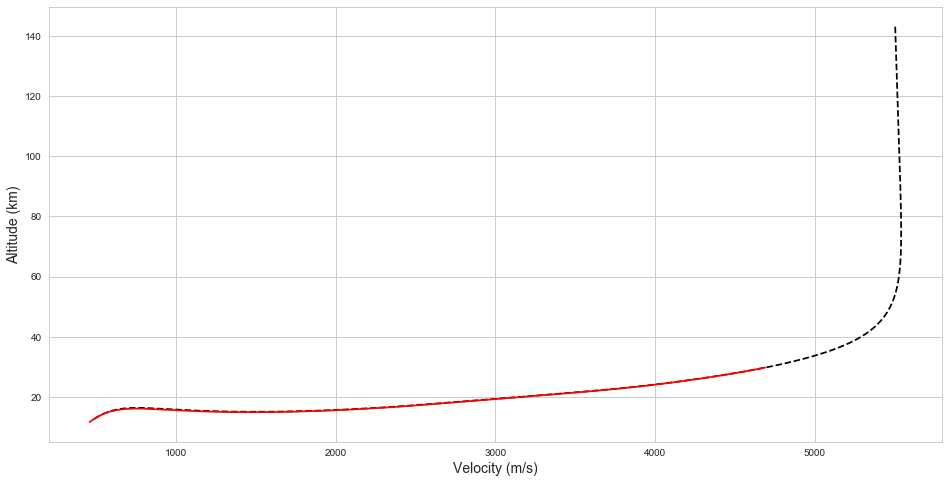

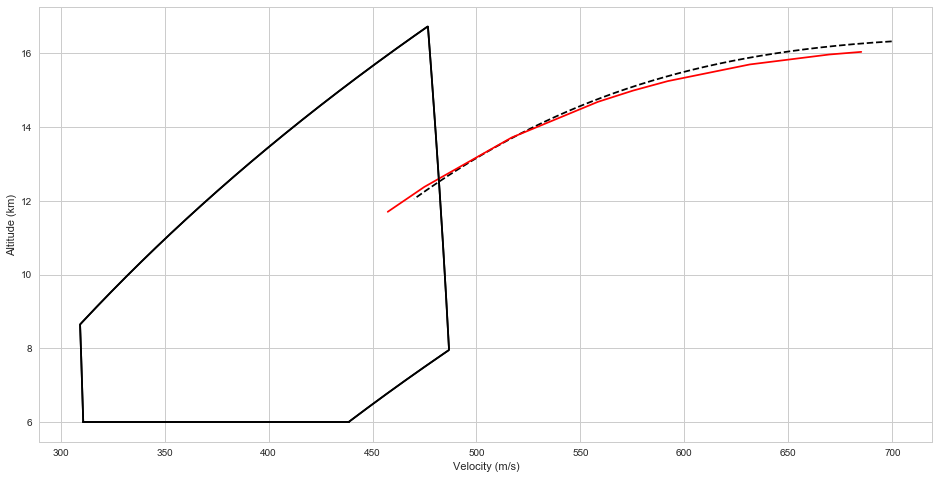

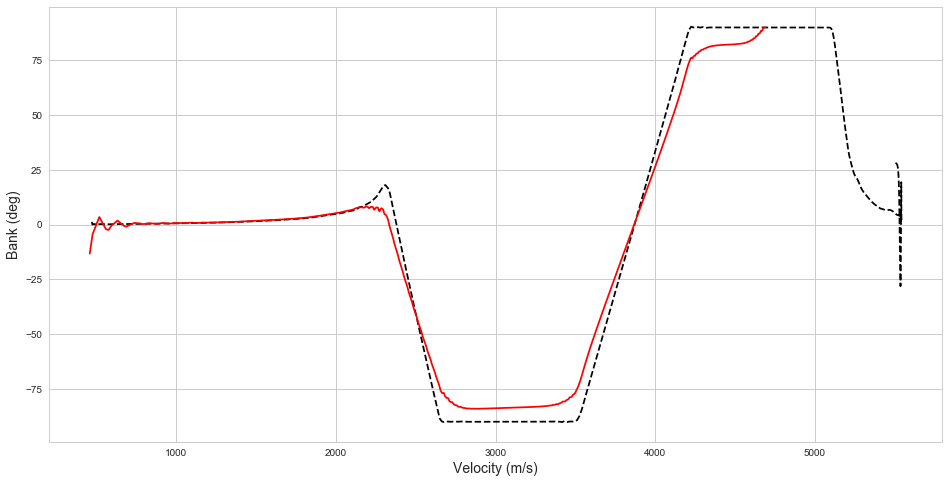

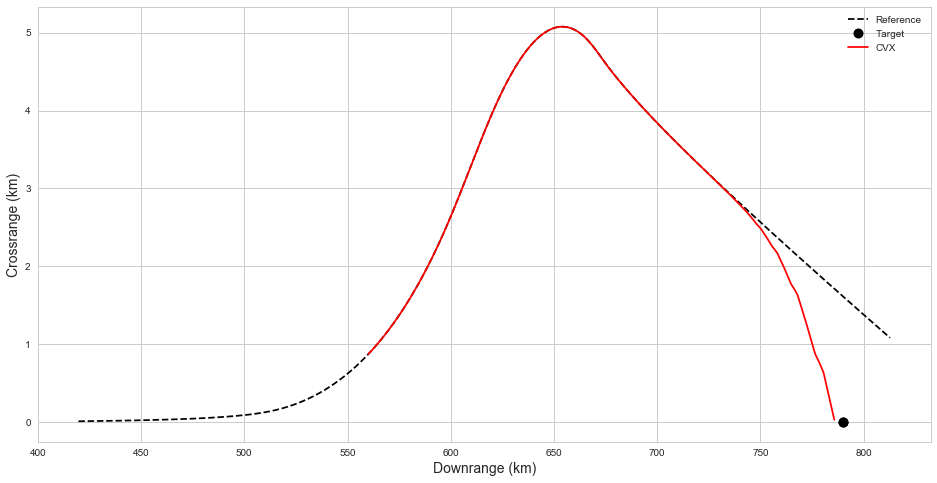

In [51]:
plt.close('all')
fs = (16,8)
fontsize = 14
for xi,spec,label in zip([x_ref,X,x_int],['k--','r','b'],['Reference','CVX','Integrated']):
    if not "Int" in label or False:
        r,th,ph,v,fpa,psi,bank = xi
        
        plt.figure(1, figsize=fs)
        plt.plot(v,r/1000-3397, spec)
        plt.xlabel('Velocity (m/s)', fontsize=fontsize)
        plt.ylabel('Altitude (km)', fontsize=fontsize)
        plt.figure(10, figsize=fs)
        plt.plot(v[v<700],r[v<700]/1000-3397, spec)
#         plt.xlabel('Velocity (m/s)')
        Parachute.Draw(10)
        
        
        plt.figure(2, figsize=fs)
#         plt.plot(np.degrees(th),np.degrees(ph),spec,label=label)
#         plt.ylabel('Latitude (deg)', fontsize=fontsize)
#         plt.xlabel('Longitude (deg)', fontsize=fontsize)
        cr = (-3397*ph)
        plt.plot(th[cr>0.01]*3397,cr[cr>0.01],spec,label=label)
        plt.plot(790, 0, 'ko', markersize=10, label='Target')
        plt.xlabel('Downrange (km)', fontsize=fontsize)
        plt.ylabel('Crossrange (km)', fontsize=fontsize)
        plt.legend(loc='best')
        
        plt.figure(3, figsize=fs)
        plt.plot(v,np.degrees(bank),spec)
        plt.xlabel('Velocity (m/s)', fontsize=fontsize)
        plt.ylabel('Bank (deg)', fontsize=fontsize)



#         plt.figure(5, figsize=fs)
#         # plt.plot(v,np.degrees(th),spec)
#         plt.plot(v,-3397*ph,spec, label=label)
#         plt.ylabel('Crossrange (km)')
#         plt.xlabel('Velocity (m/s)', fontsize=fontsize)
        
#         plt.figure(6, figsize=fs)
#         plt.plot(v,np.degrees(psi),spec)
#         plt.ylabel('Heading (deg)', fontsize=fontsize)
#         plt.xlabel('Velocity (m/s)', fontsize=fontsize)
        
#         plt.figure(4, figsize=fs)
#         plt.plot(v,np.degrees(U[label]),spec)
#         plt.xlabel('Velocity (m/s)', fontsize=fontsize)
#         plt.ylabel('Bank rate (deg/s)', fontsize=fontsize)


plt.legend(loc='best')


plt.show()

Approximating Sequence of Riccati Equations
Current iteration: 1
Current cost: 22652.4270582
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 815.919872749
            Iterations: 424
            Function evaluations: 37001
            Gradient evaluations: 424
NLP time: 15.8370001316 s
Prop used: 2119.12704781 kg


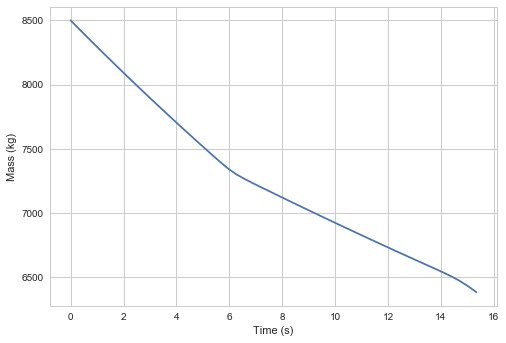

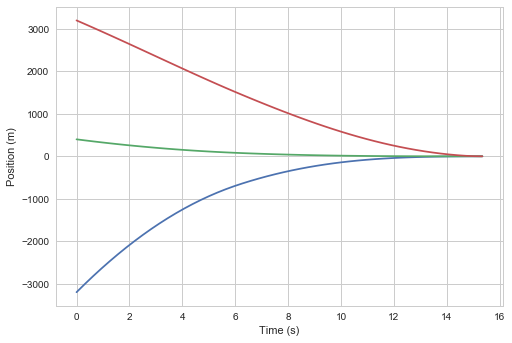

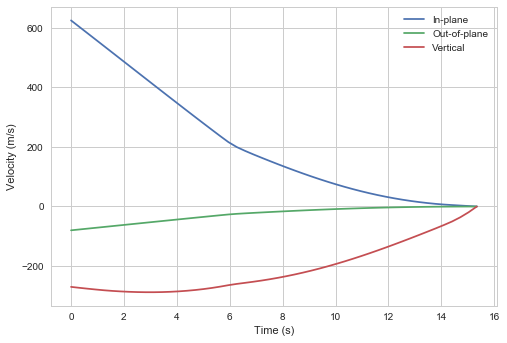

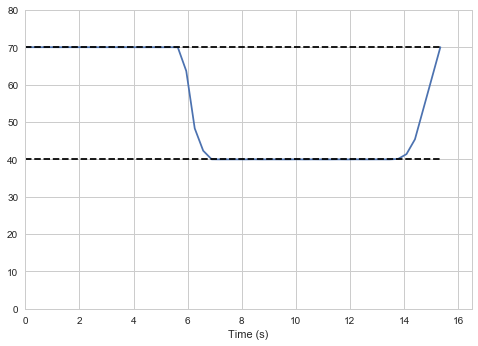

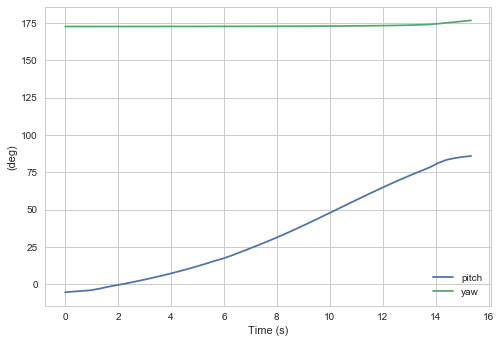

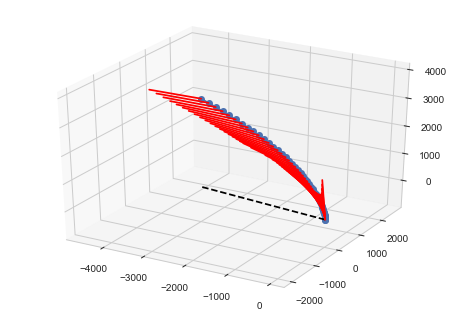

In [56]:
from EntryGuidance import bsplinePDG as PDG
reload(PDG)
PDG.optimize()

(14L, 3L)


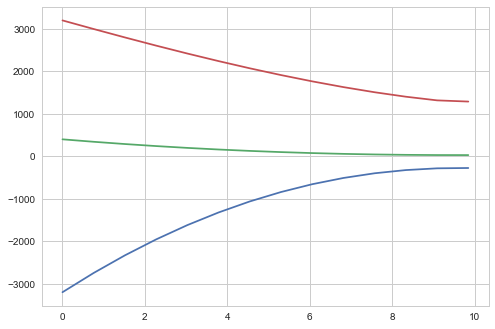

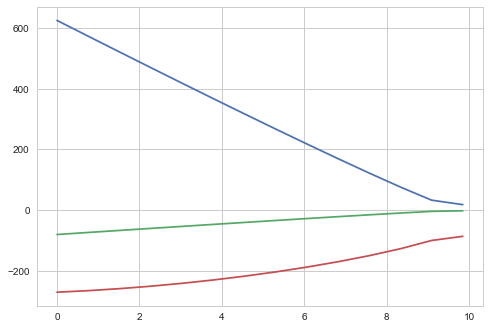

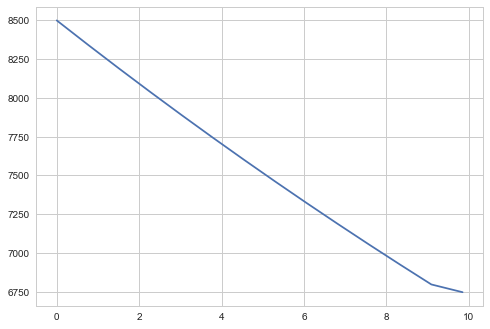

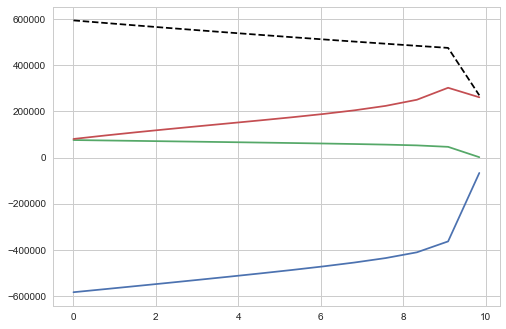

In [85]:
from EntryGuidance import DescentEquations as DE 
reload(DE)
DE.test()

In [58]:
range(3,6)

[3, 4, 5]